First 5 rows:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtyp

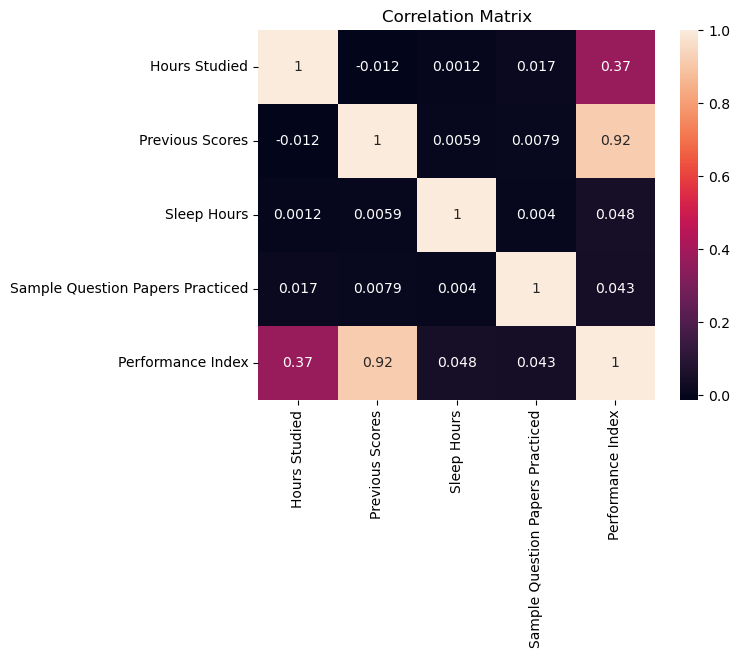


Missing values after cleaning:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


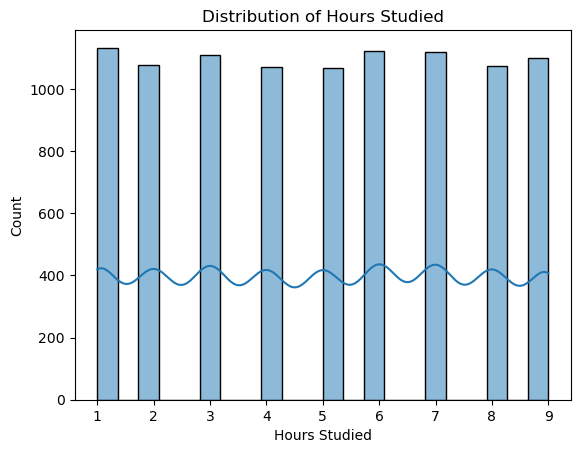

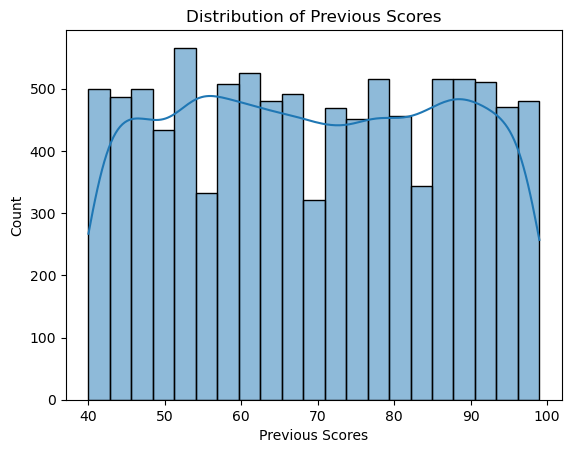

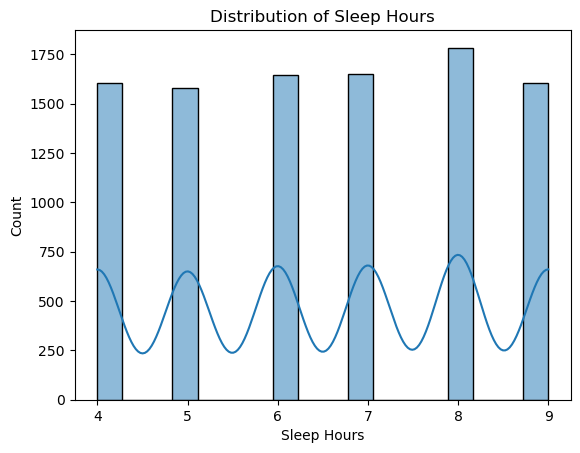

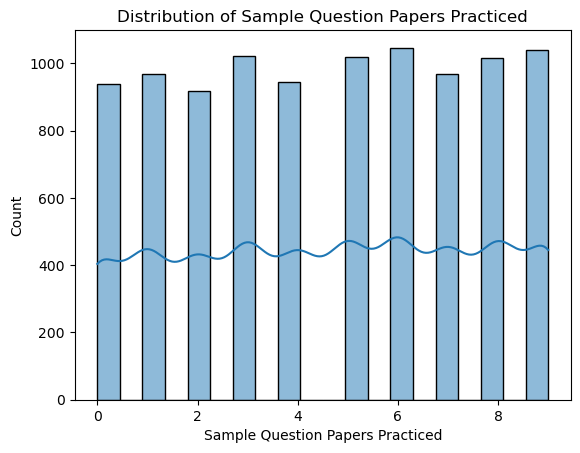

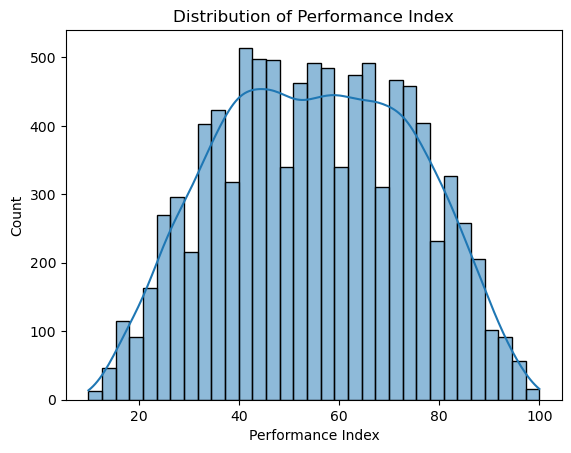

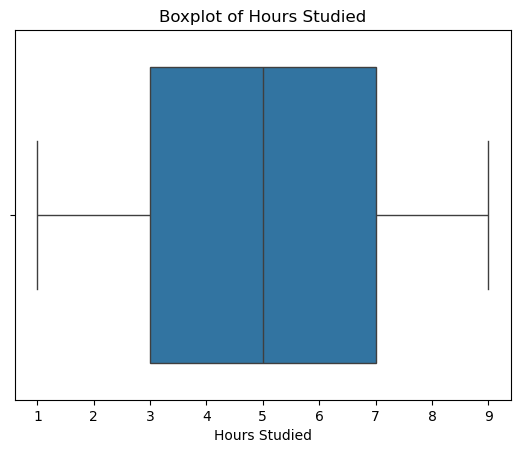

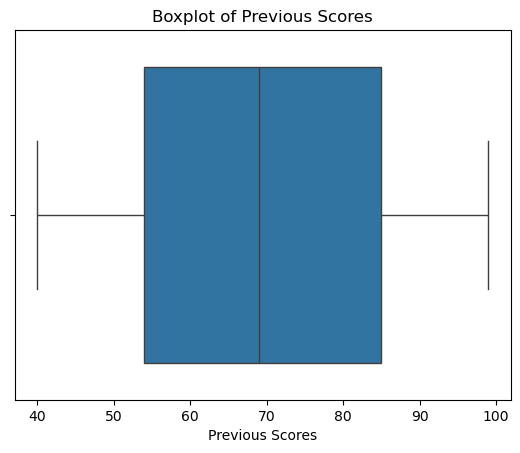

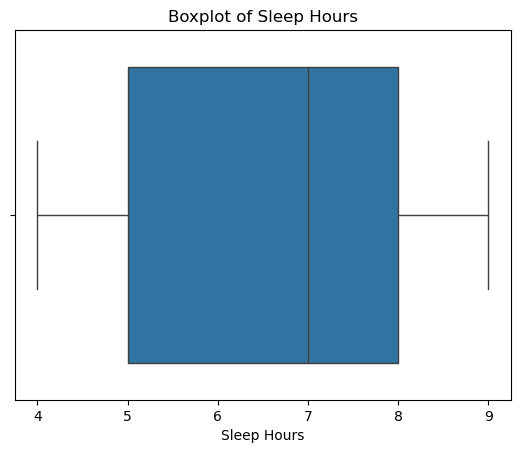

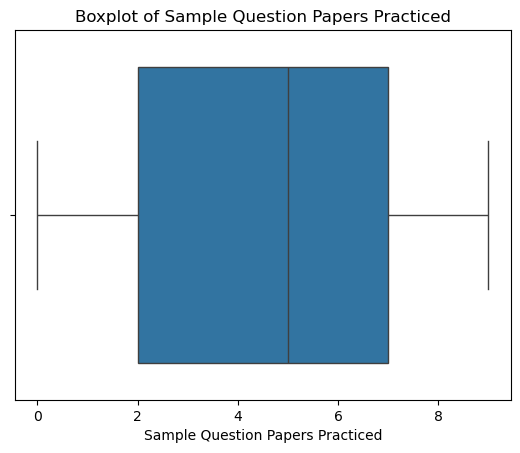

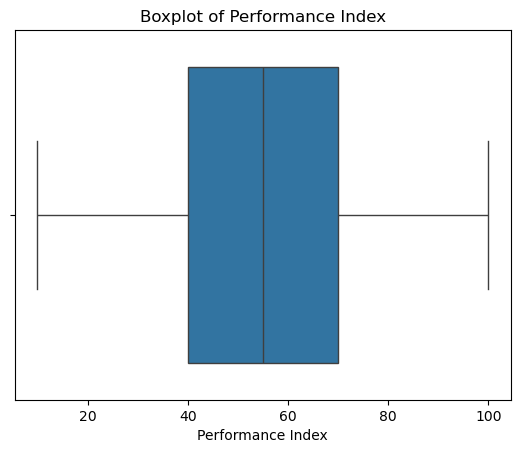


Model Evaluation:
MSE: 4.305900938538476
R2 Score: 0.9884301209927054

Model and Scaler saved successfully!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib


data = pd.read_csv("C:\\Users\\shubh\\OneDrive\\Desktop\\intern\\week 3\\day 2\\Student_Performance.csv")
data.head()

print("First 5 rows:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nStatistical Summary:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())

plt.figure()
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix")
plt.show()

data.drop_duplicates(inplace=True)

num_cols = data.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
data[num_cols] = imputer.fit_transform(data[num_cols])

# Encode categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

print("\nMissing values after cleaning:")
print(data.isnull().sum())

for col in num_cols:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

for col in num_cols:
    plt.figure()
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("MSE:", mse)
print("R2 Score:", r2)

joblib.dump(model, "trained_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\nModel and Scaler saved successfully!")